## Name: Preet Jhanglani
### Case Study 1
### Lending club dataset

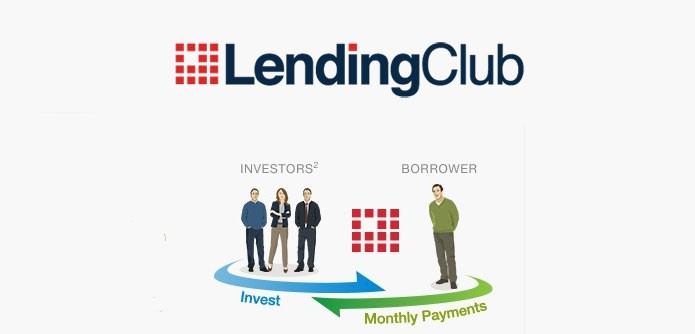

**A Brief about LendingClub: **

**LendingClub** is the first US based peer to peer lending company, headquarter in SAN Francisco, California to register its offerings as securities and exchange commission. It offers loan trading on secondary market. LendingClub enables borrowers to create unsecured personal loans between 1000 and 40000 with standard loan period of 3 years. LendingClub acts like the "bridge" between borrowers and Investors.



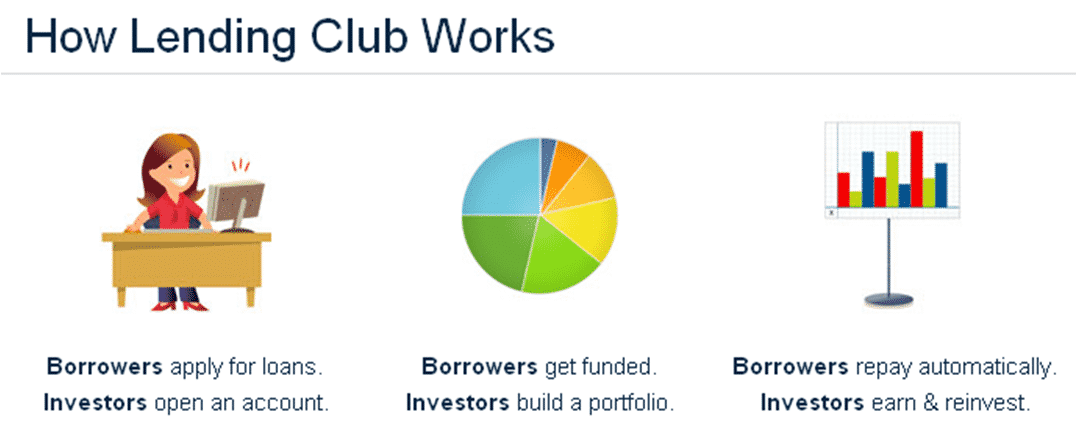

**Why do they need this analysis?**

From above working model, it is clear that its very important for LendingClub to know if there is any chance of their borrowers defaulting.

### 1) Importing the required libraries

In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from copy import deepcopy
%matplotlib inline

### 2) Reading the Data

In [148]:
data = pd.read_csv("loans_full_schema.csv")
data

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [149]:
df = deepcopy(data)

#### Lets take a look at dataset columns

In [150]:
data.columns

Index(['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'annual_income_joint',
       'verification_income_joint', 'debt_to_income_joint', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankr

##### There are 55 columns and we need to use the most correlated data columns to predict the interest rate

### 3) Pre Processing

In [151]:
data.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


##### From the above describe data we can see the count of all the columns is not equal to the length of data.That implies the data has missing values.

In [152]:
data.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [153]:
print(data.isnull().any().value_counts(), "\n")
print(f"The columns that have missing values are total {data.isnull().any().sum()}")

False    45
True     10
dtype: int64 

The columns that have missing values are total 10


In [154]:
null_columns = data.columns[data.isnull().sum() > 0].tolist()
null_columns

['emp_title',
 'emp_length',
 'debt_to_income',
 'annual_income_joint',
 'verification_income_joint',
 'debt_to_income_joint',
 'months_since_last_delinq',
 'months_since_90d_late',
 'months_since_last_credit_inquiry',
 'num_accounts_120d_past_due']

##### Lets look at these columns with missing values and if the count of missing values is greater than 50%, we will drop that column

In [155]:
drop_cols = data.loc[:,null_columns].isnull().sum()[data.loc[:,null_columns].isnull().sum().values > 5000].index.tolist()
drop_cols

['annual_income_joint',
 'verification_income_joint',
 'debt_to_income_joint',
 'months_since_last_delinq',
 'months_since_90d_late']

##### Lets drop the columns mentioned above

In [156]:
data.drop(columns=drop_cols, axis=1, inplace = True)
null_columns = data.columns[data.isnull().sum() > 0].tolist()
null_columns

['emp_title',
 'emp_length',
 'debt_to_income',
 'months_since_last_credit_inquiry',
 'num_accounts_120d_past_due']

In [157]:
null_columns

['emp_title',
 'emp_length',
 'debt_to_income',
 'months_since_last_credit_inquiry',
 'num_accounts_120d_past_due']

##### For the above columns with null lets take a look and try to replace null with some value

In [158]:
data["emp_title"].value_counts().index[0]

'manager'

The emp_title column has mode as manager. Lets replace the NaNs with manager

In [159]:
data['emp_title'].fillna(data["emp_title"].value_counts().index[0], inplace = True)
data['emp_title'].isna().sum()

0

##### Lets look at emp_length column

In [160]:
data['emp_length']

0        3.0
1       10.0
2        3.0
3        1.0
4       10.0
        ... 
9995    10.0
9996     8.0
9997    10.0
9998     1.0
9999     3.0
Name: emp_length, Length: 10000, dtype: float64

In [161]:
data.emp_length.describe()

count    9183.000000
mean        5.930306
std         3.703734
min         0.000000
25%         2.000000
50%         6.000000
75%        10.000000
max        10.000000
Name: emp_length, dtype: float64

In [162]:
data.emp_length.value_counts()

10.0    3332
2.0      967
3.0      862
0.0      690
1.0      685
5.0      645
4.0      611
6.0      404
7.0      368
9.0      312
8.0      307
Name: emp_length, dtype: int64

The mode for the emp_length column is 10.0 and the mean is 5.930306. We will round this mean to 6.0 and replace NA with this mean

In [163]:
data.emp_length.fillna(round(data.emp_length.mean()), inplace = True)
data.emp_length.isna().sum()

0

##### Now debt_to_income column

In [164]:
data.debt_to_income.describe()

count    9976.000000
mean       19.308192
std        15.004851
min         0.000000
25%        11.057500
50%        17.570000
75%        25.002500
max       469.090000
Name: debt_to_income, dtype: float64

In [165]:
data.debt_to_income.value_counts()

0.00     28
16.11    14
13.20    12
19.42    12
20.66    12
         ..
23.90     1
0.32      1
8.82      1
35.22     1
45.26     1
Name: debt_to_income, Length: 3673, dtype: int64

Replacing the NA with mean i.e 19.308192

In [166]:
data.debt_to_income.fillna(data.debt_to_income.mean(),inplace = True)
data.debt_to_income.isna().sum()

0

In [167]:
null_columns

['emp_title',
 'emp_length',
 'debt_to_income',
 'months_since_last_credit_inquiry',
 'num_accounts_120d_past_due']

##### Now months_since_last_credit_inquiry columns need to be examined

In [168]:
data.months_since_last_credit_inquiry

0        5.0
1        8.0
2        7.0
3       15.0
4        4.0
        ... 
9995     6.0
9996     1.0
9997    16.0
9998     5.0
9999    18.0
Name: months_since_last_credit_inquiry, Length: 10000, dtype: float64

In [169]:
data.months_since_last_credit_inquiry.describe()

count    8729.000000
mean        7.340703
std         5.981590
min         0.000000
25%         2.000000
50%         6.000000
75%        11.000000
max        24.000000
Name: months_since_last_credit_inquiry, dtype: float64

In [170]:
data.months_since_last_credit_inquiry.value_counts()

1.0     796
2.0     740
0.0     693
3.0     663
4.0     651
5.0     576
6.0     554
7.0     510
8.0     473
9.0     385
10.0    375
11.0    279
13.0    268
12.0    247
14.0    226
15.0    215
16.0    183
18.0    172
17.0    166
19.0    131
21.0    108
20.0    106
22.0    103
23.0     76
24.0     33
Name: months_since_last_credit_inquiry, dtype: int64

Again replace na with mean

In [171]:
data.months_since_last_credit_inquiry.fillna(round(data.months_since_last_credit_inquiry.mean()), inplace = True)
data.months_since_last_credit_inquiry.isna().sum()

0

##### Now num_accounts_120d_past_due to be examined

In [172]:
data.num_accounts_120d_past_due

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    0.0
9999    0.0
Name: num_accounts_120d_past_due, Length: 10000, dtype: float64

In [173]:
data.num_accounts_120d_past_due.describe()

count    9682.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: num_accounts_120d_past_due, dtype: float64

As all the values in this columns are 0 we can drop this column

In [174]:
data.drop('num_accounts_120d_past_due', inplace = True, axis = 1)
data

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,2001,6,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0,1996,1,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0,2006,4,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0,2007,0,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,0,2008,7,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,0,2008,5,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,4,1994,1,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,2,2004,0,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,0,1999,1,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


#### As seen in the num_accounts_120d_past_due column. A column can consists of all 0. Lets look at the numeric columns

In [175]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data_num = data.select_dtypes(include=numerics)

In [176]:
data_num

,emp_length,annual_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,3.0,90000.0,18.01,0,2001,6,28,10,70795,38767,...,0,28000,60,14.07,652.53,27015.86,1999.33,984.14,1015.19,0.0
1,10.0,40000.0,5.04,0,1996,1,30,14,28800,4321,...,1,5000,36,12.61,167.54,4651.37,499.12,348.63,150.49,0.0
2,3.0,40000.0,21.15,0,2006,4,31,10,24193,16000,...,0,2000,36,17.09,71.40,1824.63,281.80,175.37,106.43,0.0
3,1.0,30000.0,10.16,0,2007,0,4,4,25400,4997,...,0,21600,36,6.72,664.19,18853.26,3312.89,2746.74,566.15,0.0
4,10.0,35000.0,57.96,0,2008,7,22,16,69839,52722,...,0,23000,36,14.07,786.87,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10.0,108000.0,22.28,0,2008,5,44,13,199195,77963,...,1,24000,36,7.35,744.90,21586.34,2969.80,2413.66,556.14,0.0
9996,8.0,121000.0,32.38,4,1994,1,28,15,382061,101571,...,0,10000,36,19.03,366.72,9147.44,1456.31,852.56,603.75,0.0
9997,10.0,67000.0,45.26,2,2004,0,18,11,346402,95421,...,0,30000,36,23.88,1175.10,27617.65,4620.80,2382.35,2238.45,0.0
9998,1.0,80000.0,11.99,0,1999,1,38,15,294475,27641,...,0,24000,36,5.32,722.76,21518.12,2873.31,2481.88,391.43,0.0


In [177]:
data_num.columns[(data_num == 0).all()]

Index([], dtype='object')

#### As we can see there are no columns with all zero values but there might be some columns with majority of zeros

In [178]:
data_num.paid_late_fees.value_counts()

0.00     9948
15.00      19
30.00       3
23.31       3
45.12       2
16.76       2
2.00        1
19.07       1
36.60       1
25.56       1
30.41       1
16.23       1
22.58       1
15.52       1
44.48       1
21.10       1
30.33       1
36.67       1
42.91       1
32.70       1
16.63       1
24.91       1
19.92       1
25.64       1
26.49       1
32.82       1
30.75       1
20.17       1
52.98       1
Name: paid_late_fees, dtype: int64

In [179]:
zeroes = (data_num[data_num == 0].count(axis=0)/len(data_num.index))
zeroes[zeroes > 0.9]

num_collections_last_12m     0.9873
current_accounts_delinq      0.9999
num_accounts_30d_past_due    0.9999
tax_liens                    0.9754
paid_late_fees               0.9948
dtype: float64

The above columns have zeroes more than 90% of the total values. We can remove these columns

In [180]:
data.drop(columns= zeroes[zeroes > 0.9].index.tolist(), axis = 1, inplace=True)
data

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,...,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,2001,6,...,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0,1996,1,...,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0,2006,4,...,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0,2007,0,...,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,0,2008,7,...,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,0,2008,5,...,A,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,4,1994,1,...,D,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,2,2004,0,...,E,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,0,1999,1,...,A,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43


In [181]:
data.interest_rate

0       14.07
1       12.61
2       17.09
3        6.72
4       14.07
        ...  
9995     7.35
9996    19.03
9997    23.88
9998     5.32
9999    10.91
Name: interest_rate, Length: 10000, dtype: float64

#### Convert the string object data columns to numerical categories

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         10000 non-null  object 
 1   emp_length                        10000 non-null  float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    10000 non-null  float64
 7   delinq_2y                         10000 non-null  int64  
 8   earliest_credit_line              10000 non-null  int64  
 9   inquiries_last_12m                10000 non-null  int64  
 10  total_credit_lines                10000 non-null  int64  
 11  open_credit_lines                 10000 non-null  int64  
 12  total

##### We will factorise the object datatypes columns

In [183]:
obj_cols = data.select_dtypes(include=[object]).columns.tolist()
obj_cols

['emp_title',
 'state',
 'homeownership',
 'verified_income',
 'loan_purpose',
 'application_type',
 'grade',
 'sub_grade',
 'issue_month',
 'loan_status',
 'initial_listing_status',
 'disbursement_method']

Except issue_month we will convert all object columns to factors

In [184]:
obj_cols.pop(obj_cols.index('issue_month'))
obj_cols

['emp_title',
 'state',
 'homeownership',
 'verified_income',
 'loan_purpose',
 'application_type',
 'grade',
 'sub_grade',
 'loan_status',
 'initial_listing_status',
 'disbursement_method']

In [185]:
df_copy = deepcopy(data)

In [186]:
le = LabelEncoder()
for i in obj_cols:
    data.loc[:,i] = le.fit_transform(data.loc[:,i]) 

In [187]:
data

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,...,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest
0,1777,3.0,30,0,90000.0,2,18.01,0,2001,6,...,2,12,Mar-2018,1,1,0,27015.86,1999.33,984.14,1015.19
1,4675,10.0,11,2,40000.0,0,5.04,0,1996,1,...,2,10,Feb-2018,1,1,0,4651.37,499.12,348.63,150.49
2,207,3.0,47,2,40000.0,1,21.15,0,2006,4,...,3,15,Feb-2018,1,0,0,1824.63,281.80,175.37,106.43
3,1035,1.0,37,2,30000.0,0,10.16,0,2007,0,...,0,2,Jan-2018,1,1,0,18853.26,3312.89,2746.74,566.15
4,3710,10.0,4,2,35000.0,2,57.96,0,2008,7,...,2,12,Mar-2018,1,1,0,21430.15,2324.65,1569.85,754.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2830,10.0,42,2,108000.0,1,22.28,0,2008,5,...,0,3,Jan-2018,1,1,0,21586.34,2969.80,2413.66,556.14
9996,1194,8.0,37,0,121000.0,2,32.38,4,1994,1,...,3,17,Feb-2018,1,1,0,9147.44,1456.31,852.56,603.75
9997,4484,10.0,6,0,67000.0,2,45.26,2,2004,0,...,4,21,Feb-2018,1,0,0,27617.65,4620.80,2382.35,2238.45
9998,2410,1.0,47,0,80000.0,1,11.99,0,1999,1,...,0,0,Feb-2018,1,1,0,21518.12,2873.31,2481.88,391.43


In [188]:
data.to_csv('data_clean.csv', index=False)

### 3) EDA

In [189]:
data_num = data.select_dtypes(include = numerics)

In [190]:
data.corr()['interest_rate'].sort_values()

total_debit_limit                  -0.254225
disbursement_method                -0.168792
num_mort_accounts                  -0.138351
total_credit_limit                 -0.130497
account_never_delinq_percent       -0.124702
initial_listing_status             -0.100040
annual_income                      -0.099584
months_since_last_credit_inquiry   -0.092563
num_total_cc_accounts              -0.071238
total_credit_lines                 -0.044435
num_open_cc_accounts               -0.028891
emp_length                         -0.028321
num_satisfactory_accounts          -0.013330
open_credit_lines                  -0.012773
emp_title                          -0.006097
paid_principal                     -0.001953
state                               0.002507
total_collection_amount_ever        0.013532
loan_purpose                        0.019974
num_active_debit_accounts           0.026800
total_credit_utilized               0.031527
num_historical_failed_to_pay        0.037563
current_in

#### Lets plot the above correlation values of interest rates into a heatmap

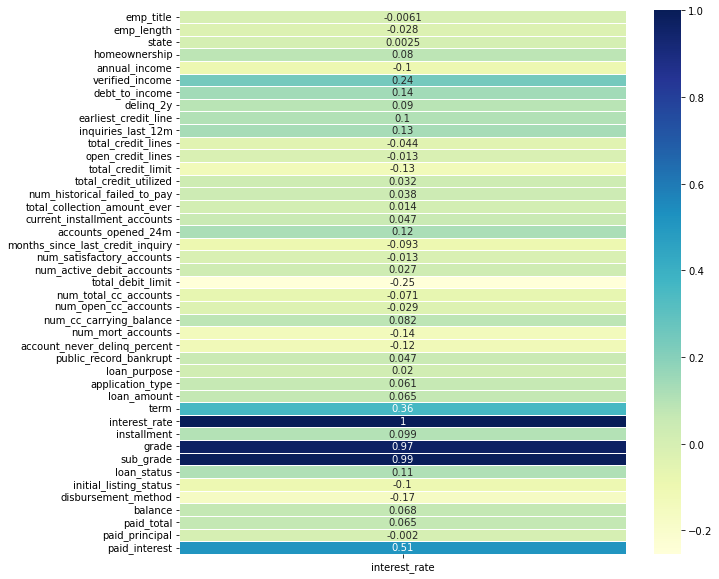

In [191]:
plt.figure(figsize=(10,10))
heat = sns.heatmap(pd.DataFrame(data.corr()['interest_rate']), cmap = 'YlGnBu', annot=True, linewidths=.5)
heat.figure.savefig('heatmap.jpg')

From the above heatmap we can say the columns of grade and sub_grade are most correlated with interest_rate. The above correlation isnt with issues_month as its a string data and I feel the interest rate should be correlated with that too.

##### Interest rate v/s issue_month

In [192]:
data['issue_month'].value_counts()

Mar-2018    3617
Jan-2018    3395
Feb-2018    2988
Name: issue_month, dtype: int64

In [205]:
issue = data[['issue_month','interest_rate']].groupby('issue_month').mean().reset_index()
issue['issue_month_num'] = pd.to_datetime(issue.issue_month)

In [207]:
issue.sort_values(by = 'issue_month_num', inplace = True)
issue

,issue_month,interest_rate,issue_month_num
1,Jan-2018,12.377402,2018-01-01
0,Feb-2018,12.510763,2018-02-01
2,Mar-2018,12.405806,2018-03-01


In [52]:
data.interest_rate.value_counts()

9.93     390
11.99    376
9.44     367
13.59    347
10.42    346
12.62    333
7.35     325
14.08    318
6.72     312
10.91    306
15.05    304
16.02    284
9.43     280
6.08     277
10.90    275
7.97     274
12.61    264
11.98    255
9.92     248
7.34     243
5.32     234
13.58    225
7.96     211
6.07     202
15.04    199
19.03    197
16.01    196
17.09    195
10.41    194
6.71     192
5.31     188
14.07    183
18.06    176
21.45    172
18.45    146
20.00    137
17.47    124
19.42    114
20.39     93
21.85     90
26.30     53
25.82     47
24.85     42
26.77     38
23.88     37
28.72     31
24.84     31
22.91     28
25.81     26
23.87     20
22.90     13
30.79     11
30.17      9
29.69      9
30.65      5
30.75      4
6.00       3
30.94      1
Name: interest_rate, dtype: int64

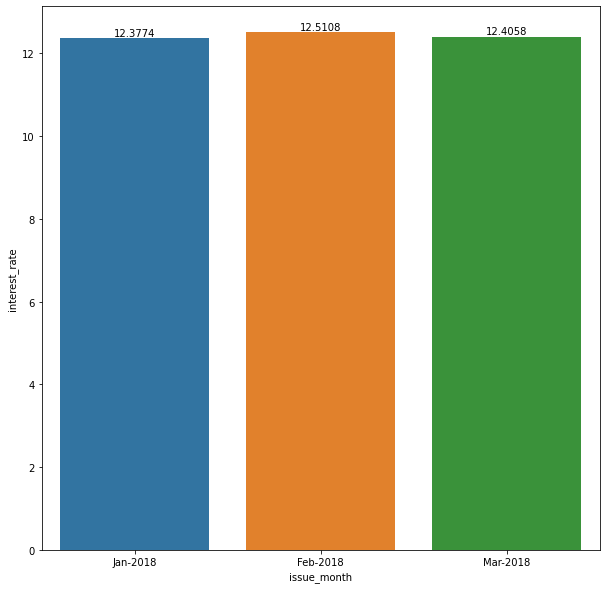

In [210]:
plt.figure(figsize=(10,10))
ax = sns.barplot(data = issue, x = 'issue_month', y = 'interest_rate')
ax.bar_label(ax.containers[0])
ax.figure.savefig('issue_month.jpg')

##### From the above bar plot we can say that the month of Feb in 2018 has a higher mean interest rate

C:\Users\preet\.conda\envs\Stevens_VE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


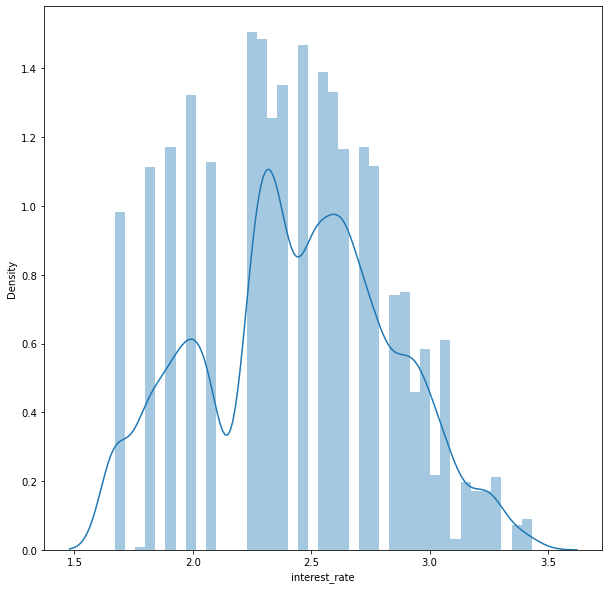

In [107]:
plt.figure(figsize=(10,10))
dist = sns.distplot(np.log(data.interest_rate))
dist.figure.savefig('dist.jpg')

##### From the above distribution plot we can say that the interest rate is not normally distributed.

In [55]:
data.grade.value_counts()

1    3037
2    2653
0    2459
3    1446
4     335
5      58
6      12
Name: grade, dtype: int64

In [57]:
df_copy.grade

0       C
1       C
2       D
3       A
4       C
       ..
9995    A
9996    D
9997    E
9998    A
9999    B
Name: grade, Length: 10000, dtype: object

In [59]:
df_copy.interest_rate

0       14.07
1       12.61
2       17.09
3        6.72
4       14.07
        ...  
9995     7.35
9996    19.03
9997    23.88
9998     5.32
9999    10.91
Name: interest_rate, Length: 10000, dtype: float64

In [61]:
df_copy[['grade','interest_rate']].groupby('grade').mean()

,interest_rate
grade,
A,6.742631
B,10.524103
C,14.176698
D,19.113451
E,25.103403
F,29.401897
G,30.802500


In [76]:
df_copy[['sub_grade','interest_rate']].groupby('sub_grade').mean().reset_index()

,sub_grade,interest_rate
0,A1,5.315545
1,A2,6.075625
2,A3,6.716190
3,A4,7.345722
4,A5,7.965649
5,B1,9.435672
6,B2,9.926113
7,B3,10.416407
8,B4,10.905267
9,B5,11.985959


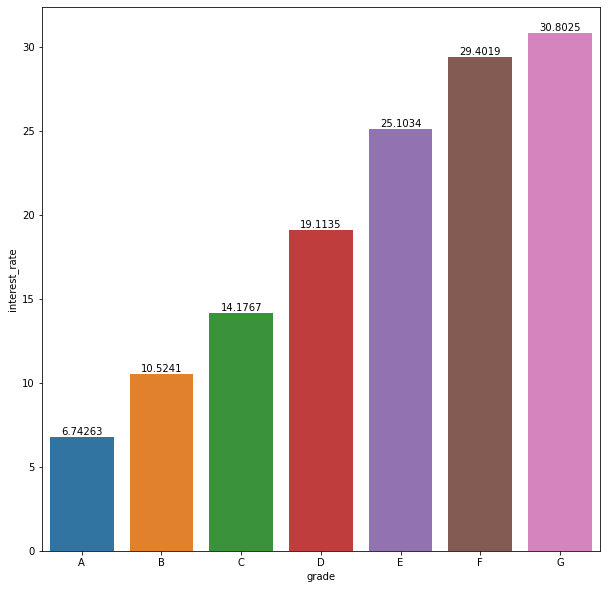

In [108]:
plt.figure(figsize=(10,10))
ax = sns.barplot(data = df_copy[['grade','sub_grade','interest_rate']].groupby('grade').mean().reset_index(), x = 'grade', y = 'interest_rate')
ax.bar_label(ax.containers[0])
ax.figure.savefig('grade.jpg')

##### In the above graph its clearly depicted that the interest rate is lower if the grade is higher.

In [98]:
int_rate = dict(df_copy[['emp_length','interest_rate']].groupby('emp_length').mean().reset_index()['interest_rate'])

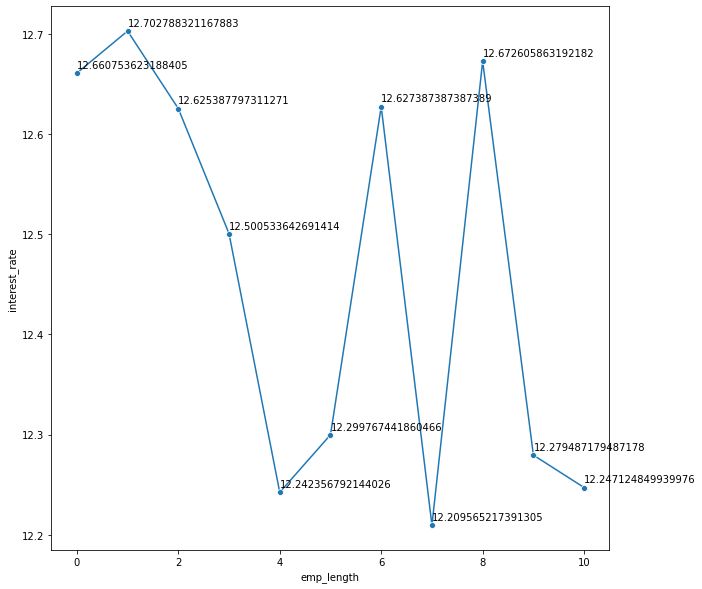

In [110]:
plt.figure(figsize=(10,10))
ax = sns.lineplot(data = df_copy[['emp_length','interest_rate']].groupby('emp_length').mean().reset_index(), x = 'emp_length', y='interest_rate', marker = 'o')
for i in int_rate:
    plt.text(i,int_rate[i] + 0.005,str(int_rate[i]))
ax.figure.savefig('emp_length.jpg')

### 4) Modeling 

#### For better accuracy we can scale the columns and we can even select the best features using PCA. We dont have that much time so we will implement a basic linear regression and a basic neural network without cross validation.

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense,Dropout
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression

In [124]:
le = LabelEncoder()
data['issue_month'] = le.fit_transform(data.issue_month)

In [125]:
y = data['interest_rate']
x = data.drop('interest_rate', axis = 1)

In [126]:
x.shape

(10000, 43)

In [127]:
y.shape

(10000,)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [129]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [131]:
#predict the interest rate
predictions = lr.predict(X_test)

In [132]:
r2_score(y_test,predictions)

0.989146922582152

In [134]:
print("Accuracy : {}".format(100 - mean_squared_error(y_test,predictions)))

Accuracy : 99.72153354549528


#### Using Linear Regression we were able to achieve an accuracy of 99.72%. 

#### Now lets implement Neural Network

In [140]:
model = Sequential()
model.add(Dense(86, input_dim=43, activation= "relu"))
model.add(Dense(43, activation= "relu"))
model.add(Dense(20, activation= "relu"))
model.add(Dense(1, activation= "relu"))
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.fit(X_train, y_train,batch_size=50, epochs=100,verbose=1)
pred= model.predict(X_test)

Epoch 1/100
134/134 [==============================] - 1s 1ms/step - loss: 178.7310 - mean_squared_error: 178.7310
Epoch 2/100
134/134 [==============================] - 0s 1ms/step - loss: 178.7310 - mean_squared_error: 178.7310
Epoch 3/100
134/134 [==============================] - 0s 1ms/step - loss: 178.7311 - mean_squared_error: 178.7311
Epoch 4/100
134/134 [==============================] - 0s 1ms/step - loss: 178.7309 - mean_squared_error: 178.7309
Epoch 5/100
134/134 [==============================] - 0s 1ms/step - loss: 178.7310 - mean_squared_error: 178.7310
Epoch 6/100
134/134 [==============================] - 0s 1ms/step - loss: 178.7310 - mean_squared_error: 178.7310
Epoch 7/100
134/134 [==============================] - 0s 1ms/step - loss: 178.7310 - mean_squared_error: 178.7310
Epoch 8/100
134/134 [==============================] - 0s 1ms/step - loss: 178.7310 - mean_squared_error: 178.7310
Epoch 9/100
134/134 [==============================] - 0s 1ms/step - loss: 178.7

In [139]:
pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [141]:
from sklearn.svm import SVR
regrassor = SVR(kernel = 'rbf')
regrassor.fit(X_train, y_train)

SVR()

In [142]:
y_pred = regrassor.predict(X_test)

In [143]:
mean_squared_error(y_test,y_pred)

22.337928213913383

In [144]:
print("Accuracy : {}".format(100 - mean_squared_error(y_test,y_pred)))

Accuracy : 77.66207178608661


#### We can implement more algorithms and even hypertune these but it requires time.